In [69]:
#imports
import testdata.TestDataGenerator as tdg
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy

In [70]:
#definitions

DIMENSIONS=2
SENSORS= 4

COORDINATE_SYSTEM = 1

INPUT_NODES = SENSORS
HIDDEN_NODES = [64,64]
OUTPUT_NODES = DIMENSIONS



In [71]:
#Generate train data

distances, datapoints, sensors = tdg.generateStatic4PointIO(1000,2,COORDINATE_SYSTEM)


xOut_Train = []
yOut_Train = []
for i in range(len(datapoints)):
    xOut_Train.append(numpy.array(datapoints[i][0]))
    yOut_Train.append(numpy.array(datapoints[i][1]))


In [72]:
#Generate Model

inp = keras.layers.Input((SENSORS,))

x = keras.layers.Dense(64, activation='relu')(inp)
x = keras.layers.Dense(64, activation='relu')(x)
xOut = keras.layers.Dense(1, activation='sigmoid', name='xOut')(x)
yOut = keras.layers.Dense(1, activation='sigmoid', name='yOut')(x)
model = keras.models.Model(inputs=inp, outputs=[xOut, yOut])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


Epoch 1/5
1000/1000 [==============================] - 0s 76us/step - loss: 0.0015 - xOut_loss: 7.5137e-04 - yOut_loss: 7.9260e-04 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 2/5
1000/1000 [==============================] - 0s 61us/step - loss: 0.0015 - xOut_loss: 7.4601e-04 - yOut_loss: 7.4618e-04 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 3/5
1000/1000 [==============================] - 0s 53us/step - loss: 0.0015 - xOut_loss: 7.7524e-04 - yOut_loss: 7.4133e-04 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 4/5
1000/1000 [==============================] - 0s 50us/step - loss: 0.0015 - xOut_loss: 7.5149e-04 - yOut_loss: 7.4308e-04 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 5/5
1000/1000 [==============================] - 0s 56us/step - loss: 0.0015 - xOut_loss: 7.4034e-04 - yOut_loss: 7.2172e-04 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00


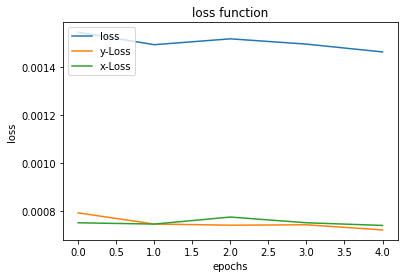

In [84]:
hist = model.fit(distances,[xOut_Train, yOut_Train,],epochs =5)
plt.title('loss function')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['yOut_loss'])
plt.plot(hist.history['xOut_loss'])
plt.legend(['loss', 'y-Loss', 'x-Loss'], loc='upper left')


In [74]:
result = model.predict(distances)

print(result[0][0], result[1][0])
print(xOut_Train[0], yOut_Train[0])

[0.30559054] [0.29884195]
0.3328337923965585 0.32101290196746735


In [75]:


test_distance, test_datapoint, test_sensor = tdg.generateStatic4PointIO(1,2,COORDINATE_SYSTEM)
xOut_Test = []
yOut_Test = []
for i in range(len(test_datapoint)):
    xOut_Test.append(numpy.array(test_datapoint[i][0]))
    yOut_Test.append(numpy.array(test_datapoint[i][1]))
    
    
result = model.predict(test_distance)

print(result)
print(xOut_Test, yOut_Test)

[array([[0.13626668]], dtype=float32), array([[0.21281765]], dtype=float32)]
[array(0.11683243)] [array(0.23017375)]
